# PyTorch Geometric(PyG)

## 载入套件

In [2]:
import torch
from torch_geometric.data import Data
import networkx as nx

## 建立图形

In [3]:
# 定义边，第一列为起点，第二列为终点，无向图须双向设定
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
# 节点名称
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

# 建立新图形
data = Data(x=x, edge_index=edge_index)
data # 节点及边均为二维

Data(x=[3, 1], edge_index=[2, 4])

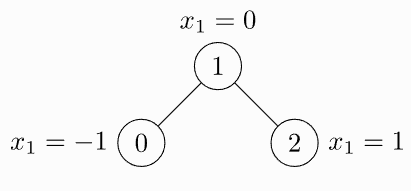

In [4]:
# 建立图形如下
from IPython.display import Image
Image('./graph/pyg_image1.png')

In [5]:
# 边有另一种写法较直觉，每一元素均为(起点，终点)
edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1]], dtype=torch.long)

# 节点名称
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

# 要加 contiguous
data = Data(x=x, edge_index=edge_index.t().contiguous())
data # 节点及边均为二维

Data(x=[3, 1], edge_index=[2, 4])

## 取得图形资讯

In [28]:
print(f'是否为有向图:{data.is_directed()}')
print(f'图形键值:{data.keys}')
print(f'节点名称:{data["x"]}')
print(f'节点个数:{data.num_nodes}')
print(f'边名称:{data["edge_index"]}')
print(f'边:{data.num_edges}')
print(f'节点属性个数:{data.num_node_features}')
print(f'未连结的节点个数:{data.has_isolated_nodes()}')
print(f'自我连结的节点个数:{data.has_self_loops()}')
print(f'节点属性个数:{data.num_node_features}')

是否为有向图:False
图形键值:['x', 'edge_index']
节点名称:tensor([[-1.],
        [ 0.],
        [ 1.]], device='cuda:0')
节点个数:3
边名称:tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]], device='cuda:0')
边:4
节点属性个数:1
未连结的节点个数:False
自我连结的节点个数:False
节点属性个数:1


## 复制到GPU记忆体

In [8]:
device = torch.device('cuda')
data = data.to(device)

## 绘图

In [18]:
list(data["edge_index"].cpu().numpy().T)

[array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([1, 2], dtype=int64),
 array([2, 1], dtype=int64)]

## [PyG/NetworkX格式互转](https://pytorch-geometric.readthedocs.io/en/latest/modules/utils.html#torch_geometric.utils.to_networkx)

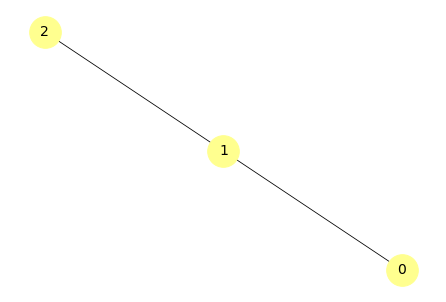

In [26]:
from torch_geometric.utils.convert import to_networkx
def draw_pyg(Data):
    G = to_networkx(Data, to_undirected=True)
    # 绘图
    nx.draw(G,
        with_labels=True,
        node_size=1000,
        node_color="#ffff8f",
        width=0.8,
        font_size=14,
    )
draw_pyg(data)    

## 自订函数

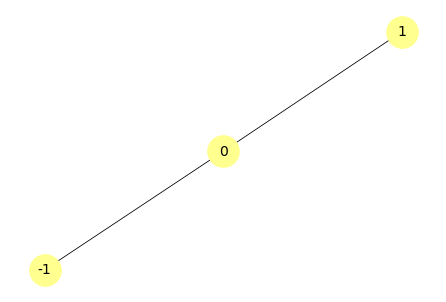

In [24]:
def draw_pyg2(data):
    G = nx.Graph()
    
    # nodes
    node_list = data["x"].cpu().numpy().reshape(data["x"].shape[0])
    node_list = node_list.astype(int) # 节点名称改为整数
    G.add_nodes_from(node_list)
    
    # edges
    edges = data["edge_index"].cpu().numpy().T
    edge_list = []
    for item in edges:
        edge_list.append((node_list[item[0]], node_list[item[1]]))
    G.add_edges_from(edge_list)

    # 绘图
    nx.draw(G,
        with_labels=True,
        node_size=1000,
        node_color="#ffff8f",
        width=0.8,
        font_size=14,
    )
    # plt.savefig('grap.png')
    
draw_pyg2(data)    

## 载入内建资料集

In [35]:
from torch_geometric.datasets import TUDataset

# 载入内建资料
dataset = TUDataset(root='./graph/ENZYMES', name='ENZYMES')

# 资料集内含的图形个数
len(dataset)

Extracting graph\ENZYMES\ENZYMES\ENZYMES.zip
Processing...
Done!


600

## 类别个数, 特征个数

In [30]:
dataset.num_classes, dataset.num_node_features

(6, 3)

## 读取第一个图形

In [31]:
dataset[0]

Data(edge_index=[2, 168], x=[37, 3], y=[1])

## 随机抽样

In [34]:
# 洗牌
dataset = dataset.shuffle()
# 读取第一个图形
dataset[0]

Data(edge_index=[2, 218], x=[96, 3], y=[1])

## 资料转换(Data Transform)

In [37]:
import torch_geometric.transforms as T
from torch_geometric.datasets import ShapeNet

dataset = ShapeNet(root='./graph/ShapeNet')

dataset[0]

C:\anaconda3\lib\site-packages\torch_geometric\data\dataset.py:150: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, make sure to sure to delete 'graph\ShapeNet\processed' first
  warnings.warn(
Processing...
Done!


Data(x=[2252, 3], y=[2252], pos=[2252, 3], category=[1])

In [36]:
import torch_geometric.transforms as T
from torch_geometric.datasets import ShapeNet

# KNNGraph：使用最近邻(KNN)演算法，每一点取6个最近的节点
dataset = ShapeNet(root='./graph/ShapeNet', categories=['Airplane'],
                    pre_transform=T.KNNGraph(k=6))

dataset[0]

Extracting graph\ShapeNet\shapenetcore_partanno_segmentation_benchmark_v0_normal.zip
Processing...
Done!


Data(x=[2518, 3], y=[2518], pos=[2518, 3], category=[1], edge_index=[2, 15108])

In [38]:
15108 / 2518

6.0

In [40]:
# 资料增补：RandomTranslate
dataset = ShapeNet(root='./graph/ShapeNet', categories=['Airplane'],
                    pre_transform=T.KNNGraph(k=6),
                    transform=T.RandomTranslate(0.01))

dataset[0]

C:\anaconda3\lib\site-packages\torch_geometric\data\dataset.py:150: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, make sure to sure to delete 'graph\ShapeNet\processed' first
  warnings.warn(


Data(x=[2518, 3], y=[2518], pos=[2518, 3], category=[1], edge_index=[2, 15108])